In [81]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Configuración inicial

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset=pd.read_csv("movies.csv", encoding="latin1")

# Exploración de datos

In [65]:
dataset.head(10)

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,director,actors,actorsPopularity,actorsCharacter,originalTitle,title,originalLanguage,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,year
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,Allison Anders|Alexandre Rockwell|Robert Rodri...,Tim Roth|Jennifer Beals|Antonio Banderas|Valer...,22.225|23.519|17.816|19.893|9.027|7.147|7.769|...,Ted the Bellhop|Angela|Man|Athena|Siegfried|Je...,Four Rooms,Four Rooms,en,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9,1995
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,Stephen Hopkins,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|St...,9.008|6.383|10.757|18.295|11.772|14.777|9.669|...,Frank Wyatt|Mike Peterson|Fallon|John Wyatt|Ra...,Judgment Night,Judgment Night,en,9.596,1993-10-15,6.5,223,3,3,2,15,3,9,1993
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,George Lucas,FALSE,11.881|24.542|14.434|10.651|6.888|5.811|1.432|...,Luke Skywalker|Han Solo|Princess Leia Organa|G...,Star Wars,Star Wars,en,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62,1977
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,Andrew Stanton,FALSE,9.79|8.084|8.538|33.379|11.733|11.866|8.141|12...,Marlin (voice)|Dory (voice)|Nemo (voice)|Gill ...,Finding Nemo,Finding Nemo,en,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18,2003
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,Robert Zemeckis,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,33.297|13.246|6.748|6.402|13.189|10.974|10.259...,Forrest Gump|Jenny Curran|Dan Taylor|Bubba|Mrs...,Forrest Gump,Forrest Gump,en,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48,1994
5,14,15000000,Drama,NaN,Jinks/Cohen Company|DreamWorks Pictures,|US,United States of America,356296601.0,122,False,Sam Mendes,Kevin Spacey|Annette Bening|Thora Birch|Wes Be...,8.142|10.723|14.227|24.207|19.17|3.568|11.866|...,Lester Burnham|Carolyn Burnham|Jane Burnham|Ri...,American Beauty,American Beauty,en,33.589,1999-09-15,8.0,9951,1,2,1,40,22,15,1999
6,15,839727,Mystery|Drama,NaN,Mercury Productions|RKO Radio Pictures,|US,United States of America,23218000.0,119,False,Orson Welles,Orson Welles|Joseph Cotten|Dorothy Comingore|R...,5.114|6.052|1.201|11.231|3.189|13.849|2.744|5....,Charles Foster Kane|Jedediah Leland|Susan Alex...,Citizen Kane,Citizen Kane,en,26.672,1941-04-17,8.0,4253,2,2,1,152,16,80,1941
7,16,12800000,Drama|Crime,NaN,Lantia Cinema & Audiovisivi|Fine Line Features...,||DK|DK||FR|SE|FR||DE|FI|FI|NL|FR|IS||||||GB|F...,Argentina|Denmark|Finland|France|Germany|Icela...,40031879.0,141,False,Lars von Trier,Björk|Catherine Deneuve|David Morse|Peter Stor...,8.166|15.759|15.657|14.721|1.96|10.063|1.38|2....,Selma Jezkova|Kathy|Bill Houston|Jeff|Oldrich ...,Dancer in the Dark,Dancer in the Dark,en,19.959,2000-06-30,7.9,1335,2,26,12,29,6,14,2000
8,18,90000000,Adventure|Fantasy|Action|Thriller|Science Fiction,NaN,Gaumont|Buena Vista International,FR|US,France,263920180.0,126,False,Luc Besson,Bruce Willis|Milla Jovovich|Gary Oldman|Ian Ho...,27.973|19.802|22.203|4.486|12.62|2.834|6.4|7.4...,Korben Dallas|Leeloo|Jean-Baptiste Emmanuel Zo...,The Fifth Element,The Fifth Element,en,44.786,1997-05-02,7.5,8726,5,2,1,117,13,48,1997
9,19,1300000,Drama|Science Fiction,NaN,UFA,DE,Germany,650422.0,149,False,Fritz Lang,Gustav Fröhlich|Brigitte Helm|Alfred Abel|Rudo...,1.335|8.247|1.852|4.302|1.4|2.341|1.814|1.233|...,Freder Fredersen|Maria / The Machine Man|Johan...,Metropolis,Metropo

In [ ]:
dataset.describe()

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         10000 non-null  int64         
 1   budget                     10000 non-null  int64         
 2   genres                     9947 non-null   object        
 3   homePage                   4193 non-null   object        
 4   productionCompany          9543 non-null   object        
 5   productionCompanyCountry   8720 non-null   object        
 6   productionCountry          9767 non-null   object        
 7   revenue                    10000 non-null  float64       
 8   runtime                    10000 non-null  int64         
 9   video                      9514 non-null   object        
 10  director                   9926 non-null   object        
 11  actors                     9920 non-null   object        
 12  actor

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset["actorsPopularity"].unique()


In [ ]:
ds_filtrado = dataset[dataset["actors"].notna() & dataset["actorsPopularity"].isna()]
ds_filtrado[["actors", "actorsPopularity"]]


In [ ]:
release_date_LK = dataset.loc[dataset["originalTitle"] == "The Lion King", "releaseDate"]
release_date_LK

In [ ]:
dataset["releaseDate"] = pd.to_datetime(dataset["releaseDate"], errors="coerce")
latest_movie = dataset.loc[dataset["releaseDate"].idxmax(), ["originalTitle", "releaseDate"]]
latest_movie


# Preguntas

In [ ]:
# Top 10 con más presupuesto
ds = dataset.sort_values(by="budget", ascending=False)
top10_budget = ds[["originalTitle", "budget"]].head(10)
top10_budget

In [ ]:
# Top 10 con más ganancias
ds = dataset.sort_values(by="revenue", ascending=False)
top10_revenue = ds[["originalTitle", "revenue"]].head(10)
top10_revenue


In [ ]:
# Película con más votos
ds = dataset.sort_values(by="voteCount", ascending=False)
most_voted = ds[["originalTitle", "voteCount"]].head(2)
most_voted

In [ ]:
# Película con peores votos en promedio

ds = dataset.sort_values(by="voteAvg", ascending=True)
worst_voted = ds[["title", "voteAvg"]].head(2)
worst_voted

In [ ]:
# Películas por año
dataset["releaseDate"] = pd.to_datetime(dataset["releaseDate"], errors="coerce")
dataset["year"] = dataset["releaseDate"].dt.year # Año de salida

movies_per_year = dataset["year"].value_counts().sort_index()

# Identificar el año con más películas
max_year = movies_per_year.idxmax()
max_movies = movies_per_year.max()
print(f"El año con más películas fue {max_year} con {max_movies} películas.")

# Gráfica de barras
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.title("Número de películas producidas por año")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Descarto algunos datos anteriores para mejor visualización

movies_per_year = dataset[dataset["year"] >= 1980]["year"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.title("Número de películas producidas por año")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [71]:
# Generos de las 20 más recientes

latest_20_movies = dataset.sort_values(by="releaseDate", ascending=False).head(20)
latest_20_genres = latest_20_movies["genres"].str.split("|").explode()
genre_counts = latest_20_genres.value_counts()
genre_counts

genres
Drama          7
Comedy         7
Thriller       3
Action         3
Romance        3
Fantasy        3
Mystery        2
Adventure      2
Horror         2
Crime          1
Documentary    1
Animation      1
Family         1
Name: count, dtype: int64

El género con más películas fue Drama con 3789 películas.


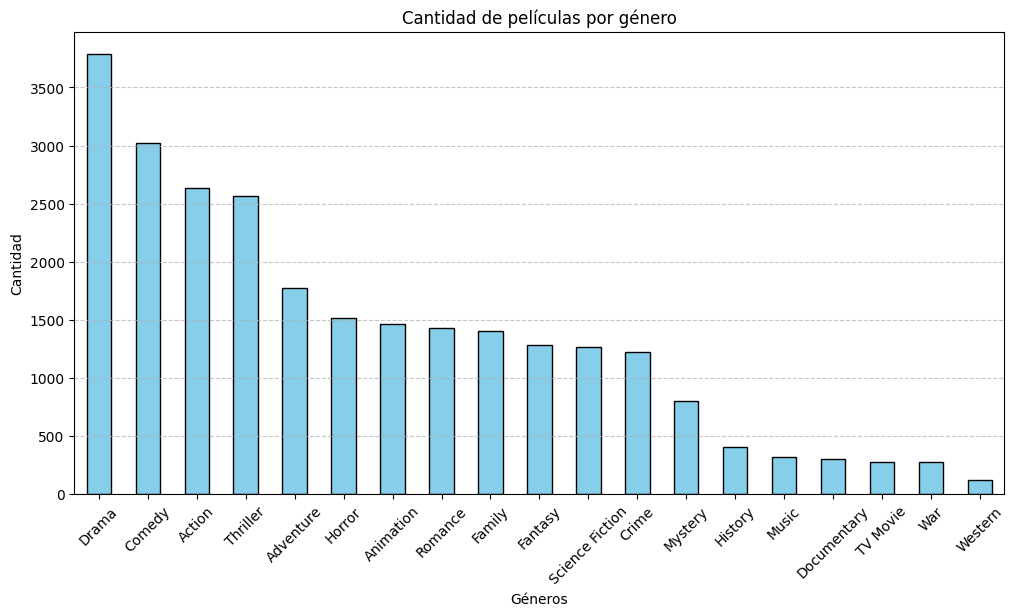

In [74]:
# Género principal de todo el dataset

all_genre = dataset["genres"].str.split("|").explode()
all_genre_counts = all_genre.value_counts()

max_genre = all_genre_counts.idxmax()
max_genre_count = all_genre_counts.max()
print(f"El género con más películas fue {max_genre} con {max_genre_count} películas.")

# Gráfica de barras

plt.figure(figsize=(12, 6))
all_genre_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Géneros")
plt.ylabel("Cantidad")
plt.title("Cantidad de películas por género")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [77]:
# Géneros de las películas más largas

longest_movies = dataset.sort_values(by="runtime", ascending=False).head(10)
longest_genres = longest_movies["genres"].str.split("|").explode()
genre_counts = longest_genres.value_counts()
genre_counts



genres
Drama              6
Action             4
History            3
Documentary        2
War                1
Romance            1
Crime              1
Thriller           1
Adventure          1
Fantasy            1
Science Fiction    1
Name: count, dtype: int64

In [80]:
# Géneros con más ganancias

dataset["profit"] = dataset["revenue"] - dataset["budget"]
top_profitable = dataset.sort_values(by="profit", ascending=False).head(10)

profitable_genre = top_profitable["genres"].str.split("|").explode()
genre_counts = profitable_genre.value_counts()
genre_counts

genres
Adventure          9
Action             7
Science Fiction    6
Fantasy            3
Thriller           2
Family             2
Animation          2
Drama              1
Romance            1
Crime              1
Comedy             1
Name: count, dtype: int64

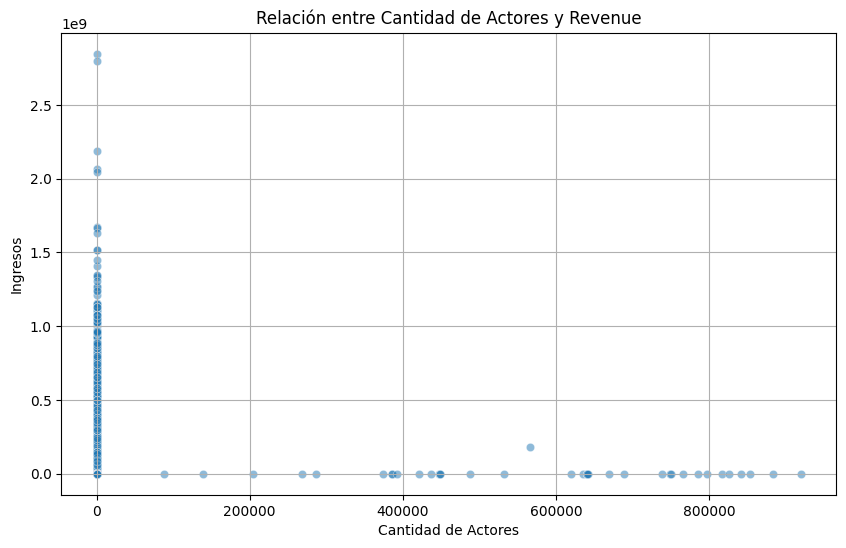

Correlación entre número de actores y revenue: -0.0196


In [84]:
# Cantidad de actores e ingresos

plt.figure(figsize=(10,6))
sns.scatterplot(x=dataset["actorsAmount"], y=dataset["revenue"], alpha=0.5)

# Configuración del gráfico
plt.xlabel("Cantidad de Actores")
plt.ylabel("Ingresos")
plt.title("Relación entre Cantidad de Actores y Revenue")
plt.grid(True)
plt.show()

# Calcular correlación
correlacion = dataset["actorsAmount"].corr(dataset["revenue"])
print(f"Correlación entre número de actores y revenue: {correlacion:.4f}")

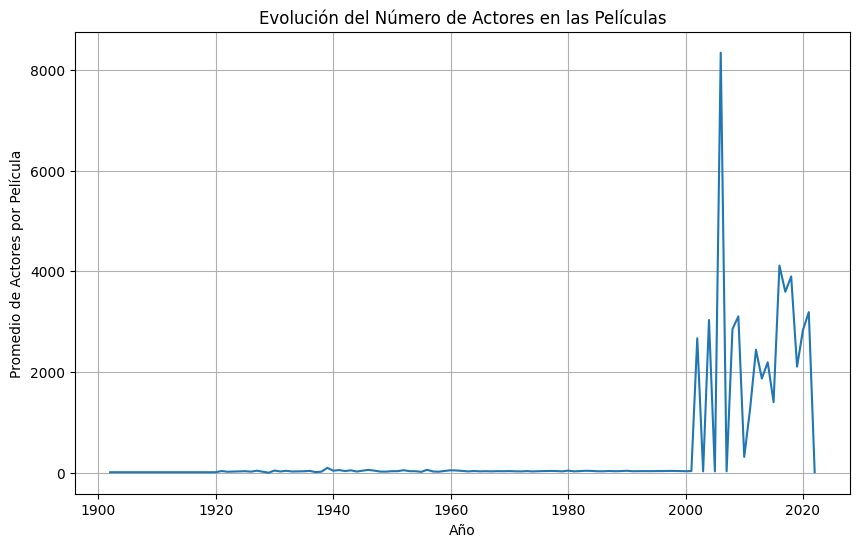

In [83]:
# Cantidad de actores en los ultimos años

dataset["year"] = dataset["releaseDate"].dt.year
actors_per_year = dataset.groupby("year")["actorsAmount"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=actors_per_year.index, y=actors_per_year.values)

plt.xlabel("Año")
plt.ylabel("Promedio de Actores por Película")
plt.title("Evolución del Número de Actores en las Películas")
plt.grid(True)
plt.show()